In [1]:
import pandas as pd

In [19]:
agencies = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-01-15/agencies.csv')
agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 19 columns):
agency                74 non-null object
count                 74 non-null int64
ucode                 74 non-null object
state_code            74 non-null object
type                  74 non-null object
class                 74 non-null object
tstart                74 non-null object
tstop                 74 non-null object
short_name            74 non-null object
name                  74 non-null object
location              74 non-null object
longitude             74 non-null object
latitude              74 non-null object
error                 74 non-null object
parent                74 non-null object
short_english_name    74 non-null object
english_name          74 non-null object
unicode_name          74 non-null object
agency_type           74 non-null object
dtypes: int64(1), object(18)
memory usage: 11.1+ KB


In [104]:
launches = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-01-15/launches.csv')
launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 11 columns):
tag            5726 non-null object
JD             5726 non-null float64
launch_date    5713 non-null object
launch_year    5726 non-null int64
type           5726 non-null object
variant        745 non-null object
mission        5705 non-null object
agency         3282 non-null object
state_code     5726 non-null object
category       5726 non-null object
agency_type    5726 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 492.2+ KB


In [62]:
agencies.agency.nunique()
agencies.groupby(['agency_type','state_code'])['count'].sum().sort_values(ascending=False)

agency_type  state_code
state        SU            2442
             US            1201
             RU             618
private      US             441
state        CN             296
private      F              278
             RU             115
state        J               78
startup      US              67
state        IN              64
private      J               36
state        I-ESA           13
             F               11
             IL              10
             I                9
             IR               8
             KP               5
private      CYM              4
state        KR               3
             I-ELDO           3
             BR               2
             UK               2
Name: count, dtype: int64

In [135]:
launches.state_code.value_counts(sort=True)
df = pd.DataFrame(launches.groupby(['launch_year','agency_type'])['agency_type'].count())

df1 = df.stack().reset_index()
df1.columns = ['Launch_Year','Agency_Type', 'Category','Count']
df1.drop(['Category'], axis = 1, inplace=True)
df1.head()

,Launch_Year,Agency_Type,Count
0,1957,state,3
1,1958,state,27
2,1959,state,22
3,1960,state,37
4,1961,state,50


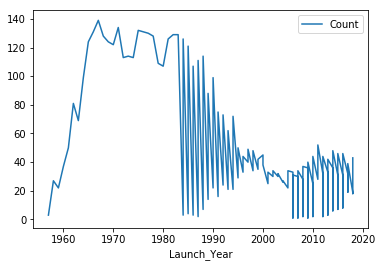

In [142]:
import matplotlib.pyplot as plt

#df1['Launch_Year'] = pd.to_datetime(df1['Launch_Year'])

#df1.plot(x='Launch_Year',y='Count')
df1.plot(x='Launch_Year', y = 'Count')
plt.show()